# MNIST handwriting classification using <font color=red>Neural Network</font>

# Index

1. Data

  1.1 Loading MNIST handwritten digits Data

  1.2 Data preprocessing

2. A model that linearly classifies using a Neural Network

3. Training

4. Test

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.17.0


# [1] Data

## [1.1] Loading MNIST handwritten digits Data

In [ ]:
# from tensorflow.example.tutorials.mnist import input_data
# https://www.tensorflow.org/get_started/mnist/beginners
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


Check by visualizing data examples

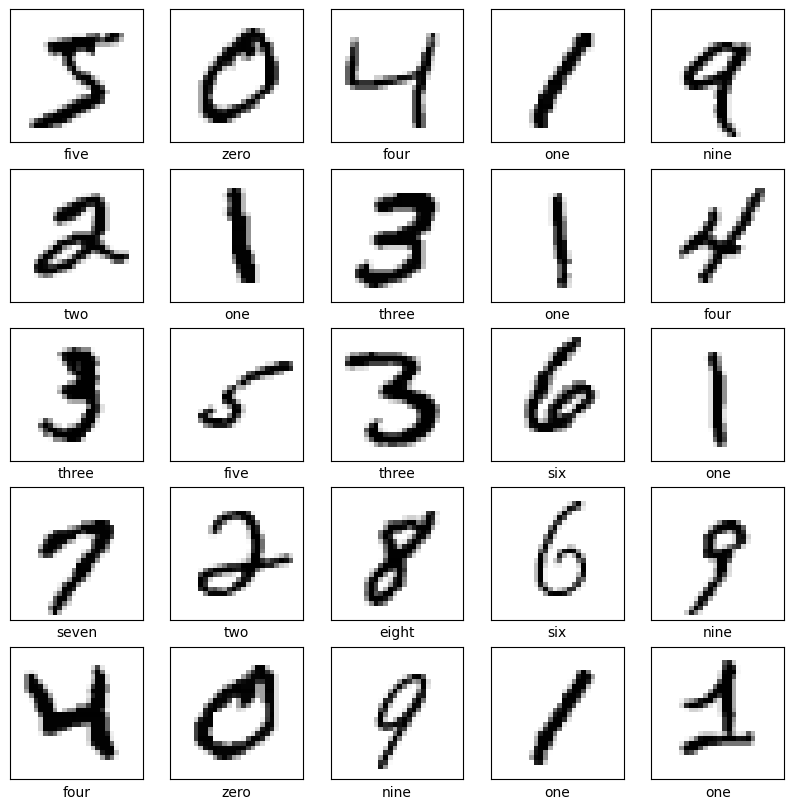

In [ ]:
class_names = ['zero', 'one', 'two', 'three', 'four', 'five',
               'six', 'seven', 'eight', 'nine']

# MNIST dataset parameters
num_classes = 10 # 0 to 9 digits
num_features = 784 # 28*28 = num_inputs, MNIST 손글씨는 28*28로 제공 됨

# plt
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(class_names[y_train[i]])
  plt.grid(False) # 이미지에 격자선 표시하지 않기
  plt.imshow(x_train[i], cmap=plt.cm.binary) # 흑백 이미지로 출력

## [1.2] Data preprocessing
- 딥러닝 프레임워크는 **float32** 형식을 사용하여 연산을 수행.
- 완전 연결된 신경망(fully connected layer)을 사용할 때는 입력(각 이미지)를 1차원 벡터로 변환.
- 0에서 1 사이의 정규화를 통해 신경망이 수렴 속도를 높이고 학습 안정성을 높이는 데 도움.

In [ ]:
# Convert to float32
x_train, y_train = np.array(x_train, np.float32), np.array(y_train, np.float32)
x_test, y_test = np.array(x_test, np.float32), np.array(y_test, np.float32)

# Flatten images to 1D vector of 784(28*28) features
# 28*28의 2D(2차원) 데이터 ->  784의 1D(1차원) 데이터로 펼친다
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Normalize images value from [0,255] to [0,1]
x_train, x_test = x_train / 255., x_test / 255.


x_train shape: (60000, 784), y_train shape: (60000,)
x_test shape: (10000, 784), y_test shape: (10000,)


# [2] A model that classifies **<font color=red>non-linearly</font>** using a **<font color=red>Neural Network</font>**


## Neural Network 모델 설정
***Sequential 모델***
- 층을 순차적으로 쌓아 올리는 가장 단순한 형태의 모델. 각 레이어가 하나씩 순서대로 추가 됨.

***Dense 레이어***
- Dense는 완전 연결 층(fully connected layer)을 정의. 모든 입력 뉴런이 모든 출력 뉴런과 연결되는 레이어.
- units: 뉴런의 수를 지정. 예를 들어 units=64는 해당 층에 64개의 뉴런이 있다는 의미.
- activation: 활성화 함수(예: 'relu', 'softmax')를 지정하여, 뉴런의 출력을 변환.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Sequential 모델 생성
model = Sequential()
# model.add(Flatten(input_shape=(28,28)))
model.add(Dense(units=128, input_shape=(784,), activation='relu')) # 입력층과 첫 번째 은닉층
model.add(Dense(units=128, activation='relu')) # 두 번째 은닉층
model.add(Dense(units=10, activation='softmax')) # 출력층 (10개의 클래스)
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

# [3] Training
***loss='sparse_categorical_crossentropy'***
- y_train이 정수형 레이블(0, 1, 2 등)로 주어졌을 때 사용. (정수형 레이블을 원-핫 인코딩하지 않고 사용할 수 있음)

***loss='categorical_crossentropy'***
- 원-핫 인코딩된 레이블을 필요로 함

In [ ]:
#원-핫 인코딩이 필요하다면
#model.compile(optimizer='adam',
#              loss='categorical_crossentropy',
#              metrics=['accuracy'])

#history = model.fit(x_train, tf.one_hot(y_train, depth=num_classes), epochs=10, batch_size=256, verbose=1)
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# verbose=1: 학습 중 진행 상황을 에포크별로 진행 상황이 출력되도록, 디폴트 값이 1
history = model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=1)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7994 - loss: 0.7349
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9521 - loss: 0.1679
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9671 - loss: 0.1129
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9745 - loss: 0.0850
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9803 - loss: 0.0673
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9845 - loss: 0.0551
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9869 - loss: 0.0462
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9890 - loss: 0.0384
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9918 - loss: 0.0305
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9937 - loss: 0.0246


Visualizing the learning process

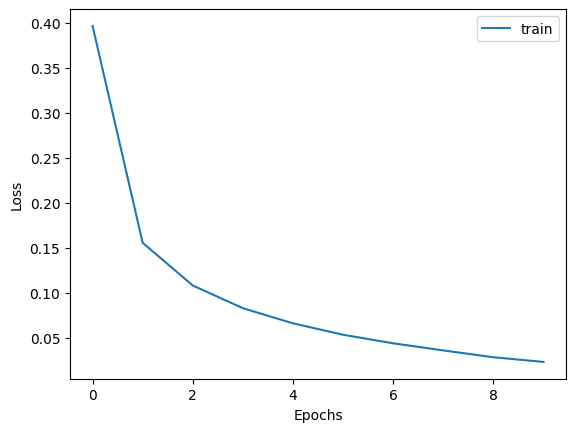

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss')
pyplot.legend()
pyplot.show()

# [4] Test

In [ ]:
train_loss, train_acc = model.evaluate(x_train, y_train, verbose=0)
print(f"Train loss: {train_loss}, Train accuracy: {train_acc}")

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test loss: {test_loss}, Test accuracy: {test_acc}")

# 전제 테스트 데이터 예측
predict = model.predict(x_test)
print(predict)

Train loss: 0.021972404792904854, Train accuracy: 0.9937833547592163
Test loss: 0.07599817961454391, Test accuracy: 0.9772999882698059
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[[4.5753445e-09 2.8120324e-09 5.3161506e-07 ... 9.9995369e-01
  7.5426625e-09 5.5932964e-07]
 [2.5247214e-11 4.0137515e-05 9.9994689e-01 ... 6.8671653e-13
  1.7105995e-07 4.6920468e-10]
 [3.1471370e-07 9.9865997e-01 2.5142365e-04 ... 4.9291237e-04
  4.7520152e-04 6.3898926e-07]
 ...
 [1.2206692e-13 1.9077546e-09 9.3093317e-13 ... 7.0654716e-07
  1.1472734e-08 1.8134786e-05]
 [8.1504463e-11 9.1979523e-12 7.4564871e-13 ... 6.6684579e-12
  3.1651550e-06 2.3840627e-10]
 [1.3419493e-10 3.5990406e-13 3.1427964e-11 ... 5.4682113e-15
  6.0419256e-12 2.1449083e-13]]


Test Visualization

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


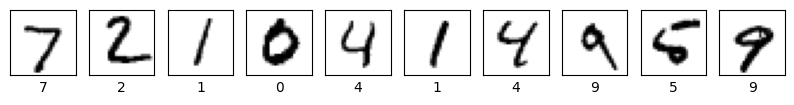

In [ ]:
# 10개 테스트 데이터만 뽑아서 시각화
n_images = 10
test_images = x_test[:n_images]
predictions = model.predict(test_images)

# Display image and model prediction
plt.figure(figsize=(10, 10))
for i in range(n_images):
  plt.subplot(1, n_images, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(np.argmax(predictions[i])) # 가장 큰 값의 인덱스 출력
  plt.grid(False)
  plt.imshow(np.reshape(test_images[i], [28, 28]), cmap=plt.cm.binary)
plt.show()